In [1]:
import pandas as pd
import numpy as np
import eda



Bad key "text.kerning_factor" on line 4 in
C:\Users\enes_\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [3]:
eda.miss.check(df)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           19.87
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin         77.10
Embarked       0.22
dtype: float64

In [4]:
df = eda.miss.fill(df)

In [5]:
eda.miss.check(df)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin         74.09
Embarked       0.28
dtype: float64

In [6]:
del df["PassengerId"]
del df["Name"]
del df["SibSp"]
del df["Parch"]
del df["Ticket"]
del df["Fare"]
del df["Cabin"]
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.00,S
1,1,1,female,38.00,C
2,1,3,female,26.00,S
3,1,1,female,35.00,S
4,0,3,male,35.00,S
...,...,...,...,...,...
709,0,3,female,39.00,Q
710,0,2,male,27.00,S
711,1,1,female,19.00,S
712,1,1,male,26.00,C


In [7]:
x = pd.get_dummies(df["Pclass"])
x.columns = ["firstclass","secondclass","thirdclass"]
df =pd.merge(df,x,left_index=True,right_index=True)
del df["Pclass"]

In [8]:
x = pd.get_dummies(df["Embarked"])
df =pd.merge(df,x,left_index=True,right_index=True)
del df["Embarked"]
df

,Survived,Sex,Age,firstclass,secondclass,thirdclass,C,Q,S
0,0,male,22.00,0,0,1,0,0,1
1,1,female,38.00,1,0,0,1,0,0
2,1,female,26.00,0,0,1,0,0,1
3,1,female,35.00,1,0,0,0,0,1
4,0,male,35.00,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
709,0,female,39.00,0,0,1,0,1,0
710,0,male,27.00,0,1,0,0,0,1
711,1,female,19.00,1,0,0,0,0,1
712,1,male,26.00,1,0,0,1,0,0


In [9]:
x = pd.get_dummies(df["Sex"])
df =pd.merge(df,x,left_index=True,right_index=True)
del df["Sex"]
df

,Survived,Age,firstclass,secondclass,thirdclass,C,Q,S,female,male
0,0,22.00,0,0,1,0,0,1,0,1
1,1,38.00,1,0,0,1,0,0,1,0
2,1,26.00,0,0,1,0,0,1,1,0
3,1,35.00,1,0,0,0,0,1,1,0
4,0,35.00,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
709,0,39.00,0,0,1,0,1,0,1,0
710,0,27.00,0,1,0,0,0,1,0,1
711,1,19.00,1,0,0,0,0,1,1,0
712,1,26.00,1,0,0,1,0,0,0,1


In [10]:
eda.miss.check(df)

Survived      0.00
Age           0.00
firstclass    0.00
secondclass   0.00
thirdclass    0.00
C             0.00
Q             0.00
S             0.00
female        0.00
male          0.00
dtype: float64

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y=df["Survived"]
x=df.drop(columns="Survived")


neighbor = KNeighborsClassifier(n_neighbors=1)
sneighbor = KNeighborsClassifier(n_neighbors=5)

xtr,xte,ytr,yte= train_test_split(x,y)



In [24]:
neighbor.fit(xtr,ytr)
sneighbor.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

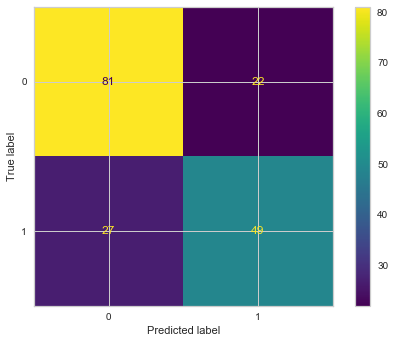

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neighbor,xte,yte)

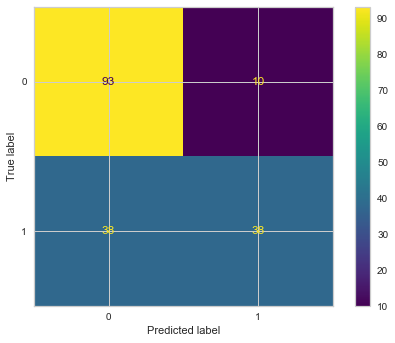

In [26]:
plot_confusion_matrix(sneighbor,xte,yte)

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
print("Score of k=1:",roc_auc_score(yte,neighbor.predict(xte)))
print("Score of k=5:",roc_auc_score(yte,sneighbor.predict(xte)))

Score of k=1: 0.7155723045477772
Score of k=5: 0.7014563106796117


In [41]:
from sklearn.model_selection import GridSearchCV
parametreler = {"n_neighbors": [x for x in range (1, 6, 1)],
                "metric": ['euclidean', 'manhattan',"minkowski"]
                }




grid_cv = GridSearchCV(estimator=neighbor,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(x, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score         : ", grid_cv.best_score_)

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}
Best Score         :  0.7970266040688576


In [45]:
results = grid_cv.cv_results_
results = pd.DataFrame(results)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00,0.00,0.00,0.00,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.69,0.71,0.72,0.79,0.76,0.75,0.82,0.76,0.76,0.79,0.76,0.04,14
1,0.00,0.00,0.00,0.00,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.78,0.71,0.74,0.79,0.76,0.76,0.76,0.76,0.79,0.75,0.76,0.02,12
2,0.00,0.00,0.00,0.00,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.76,0.74,0.74,0.79,0.77,0.79,0.85,0.76,0.76,0.77,0.77,0.03,6
3,0.00,0.00,0.00,0.00,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.75,0.71,0.72,0.79,0.82,0.79,0.79,0.76,0.83,0.76,0.77,0.04,8
4,0.00,0.00,0.00,0.00,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.74,0.74,0.74,0.83,0.79,0.83,0.86,0.77,0.82,0.79,0.79,0.04,2


In [46]:
df.to_csv("ready-to-use-titanic.csv")